In [1]:
import torch
from torch.autograd import grad
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
solve_ivp=scipy.integrate.solve_ivp
from torch.autograd import Variable
import autograd
import autograd.numpy as np

# Hamiltonian

In [14]:
def Hamiltonian(y):
    q, p = np.split(y,2)
    H = p**2 + q**2
    return H

# Dynamics of Hamiltonian == gradiant of Hamiltonian

In [15]:
def grad_Hamiltonian(t,yold):
       
      
    
    dcoords = autograd.grad(Hamiltonian)(yold)
    dHdq, dHdp = np.split(dcoords,2)
    S = np.concatenate([dHdp, -dHdq], axis=-1)
    return S

# trajectory

In [16]:
def trajectory(t,y0):
   
    
    
    noise_std=0.1
    sol = solve_ivp(fun=grad_Hamiltonian,t_span=t,y0=y0)
    q_new,p_new=sol.y
    
    dydt = [grad_Hamiltonian( None,y) for y in sol['y'].T]
    print(dydt)
    dydt = np.stack(dydt).T
    dq, dp = np.split(dydt,2)
    # add noise
    q_new += np.random.randn(*q_new.shape)*noise_std
    p_new += np.random.randn(*p_new.shape)*noise_std
    return q_new,p_new,dq,dp
    #return solve_ivp(fun=fun,t_span=t,y0=y0).y

[array([ 0., -2.]), array([-1.99800167e-03, -1.99999900e+00]), array([-0.02197758, -1.99987924]), array([-0.22132399, -1.9877162 ]), array([-1.37807543, -1.44941953]), array([-1.9848462,  0.2452153]), array([-0.88627751,  1.79282597]), array([0.99685612, 1.73376257]), array([1.98209662, 0.26601116]), array([ 1.29540034, -1.52361902]), array([-0.5028603 , -1.93558551]), array([-1.88223735, -0.67561684]), array([-1.59820548,  1.20207534]), array([0.01463285, 1.99971685]), array([1.68840382, 1.07162291]), array([ 1.8368361, -0.7905897]), array([ 0.45129485, -1.94812033]), array([-1.39061348, -1.43702139]), array([-1.97823313,  0.29204641]), array([-0.84570571,  1.8120273 ]), array([1.03841196, 1.70889125]), array([1.98849894, 0.21047278]), array([ 1.25173485, -1.55935747]), array([-0.56262238, -1.91879683]), array([-1.89839461, -0.62795178]), array([-1.56511601,  1.24443313]), array([0.07530838, 1.99809198]), array([1.71846148, 1.02221771]), array([ 1.81083745, -0.84783815]), array([ 0.40

(-1.3480356574509746,
 1.2411832588898044,
 -1.3157551956296027,
 1.270740684349343)

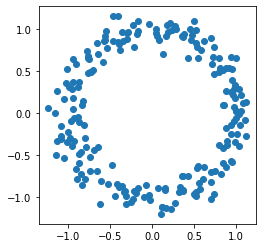

In [17]:
y0=np.array([1.,0.])
t=[0,100]
q_new,p_new,dq,dp=trajectory(t,y0)
plt.scatter(q_new,p_new)
plt.axis("scaled")


In [18]:
def get_dataset(seed=0, samples=50, test_split=0.5):
    data = {'meta': locals()}

    # randomly sample inputs
    np.random.seed(seed)
    xs, dxs = [], []
    for s in range(samples):
        q, p, dq, dp = get_trajectory()
        xs.append( np.stack( [q, p]).T )
        dxs.append( np.stack( [dq, dp]).T )
        
    data['q&p'] = np.concatenate(xs)
    data['dq&dp'] = np.concatenate(dxs).squeeze()

    # make a train/test split
    split_ix = int(len(data['q&p']) * test_split)
    split_data = {}
    for k in ['q&p', 'dq&dp']:
        split_data[k], split_data['test_' + k] = data[k][:split_ix], data[k][split_ix:]
    data = split_data
    return data


# Run analizis

In [12]:
#y0=torch.tensor([[1., 0.], [1., -1.]], requires_grad=True)
y0=np.array([1.,0.])
t=[0,100]
q_new,p_new,dq,dp=trajectory(t,y0)
plt.scatter(q_new,p_new)
plt.axis("scaled")


TypeError: cannot unpack non-iterable NoneType object